# Feature Scaling 

## - Standardization vs Normalization

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df2 = df[['survived','pclass','age','parch']]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df3  = df2.fillna(df2.mean())

In [6]:
#Convert into matrix and into vector

In [8]:
x = df3.drop('survived',axis=1)
y = df3['survived']

print('Shape of x = ', x.shape)
print('Shape of y = ', y.shape)

Shape of x =  (891, 3)
Shape of y =  (891,)


In [38]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=51)

In [39]:
print('Shape of x_train = ' ,x_train.shape)
print('Shape of x_test = ' ,x_test.shape)
print('Shape of y_train = ' ,y_train.shape)
print('Shape of y_test = ' ,y_test.shape)

Shape of x_train =  (712, 3)
Shape of x_test =  (179, 3)
Shape of y_train =  (712,)
Shape of y_test =  (179,)


In [40]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [41]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [42]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [43]:
x_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [44]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [45]:
x_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [46]:
x_test_sc

array([[-1.54750023,  0.80404914, -0.49198545],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [ 0.8220055 ,  0.03432278, -0.49198545],
       [-1.54750023,  0.01116307, -0.49198545],
       [-0.36274737,  0.34221332,  0.76354731],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [-1.54750023,  1.34285759, -0.49198545],
       [ 0.8220055 , -1.04329413, -0.49198545],
       [-0.36274737,  2.80533768, -0.49198545],
       [-1.54750023, -1.12026677,  0.76354731],
       [-0.36274737,  0.11129541, -0.49198545],
       [-0.36274737, -0.1196225 , -0.49198545],
       [-1.54750023,  1.18891232, -0.49198545],
       [ 0.8220055 , -0.50448568, -0.49198545],
       [ 0.8220055 ,  0.88102177,  5.78567837],
       [-0.36274737, -0.35054041, -0.49198545],
       [-0.36274737,  0.49615859,  2.01908008],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [-0.36274737, -0.81237622, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.491

In [47]:
x_train_sc = pd.DataFrame(x_train_sc , columns = ['pclass','age','parch'])
x_test_sc = pd.DataFrame(x_test_sc , columns = ['pclass','age','parch'])

In [48]:
x_train_sc.describe()

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,5.270441e-17,1.515642e-16,2.440308e-17
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.547500e+00,-2.242528e+00,-4.919855e-01
25%,-6.589356e-01,-5.814583e-01,-4.919855e-01
50%,8.220055e-01,1.116307e-02,-4.919855e-01
75%,8.220055e-01,4.191860e-01,-4.919855e-01
max,8.220055e-01,3.190201e+00,5.785678e+00


In [49]:
mmc = MinMaxScaler()

In [51]:
mmc.fit(x_train)

MinMaxScaler()

In [54]:
x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)

In [56]:
x_train_mmc = pd.DataFrame(x_train_mmc , columns = ['pclass','age','parch'])
x_test_mmc = pd.DataFrame(x_test_mmc , columns = ['pclass','age','parch'])

In [57]:
x_train_mmc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


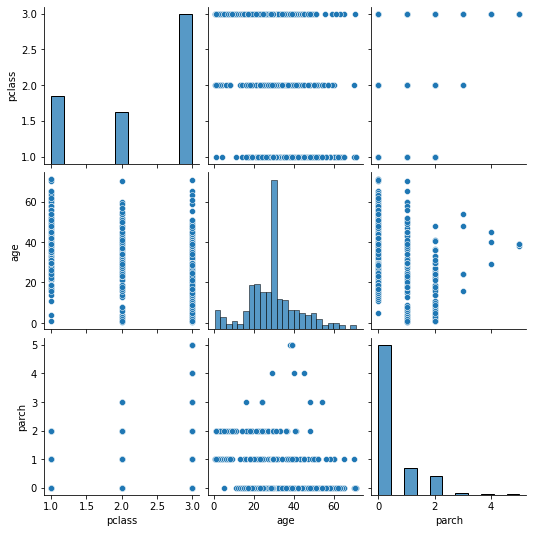

In [58]:
sns.pairplot(x_train)

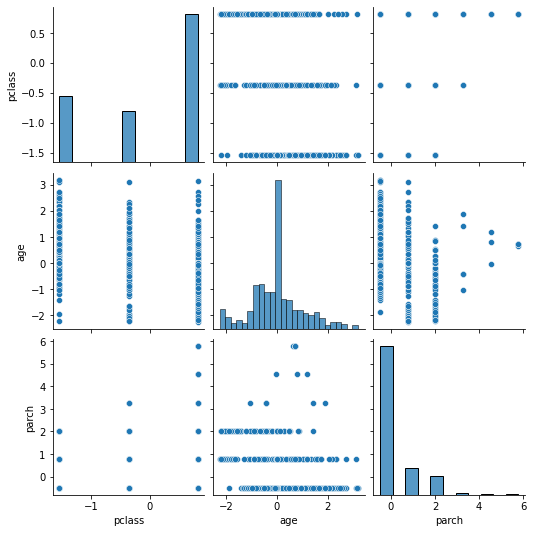

In [59]:
sns.pairplot(x_train_sc)

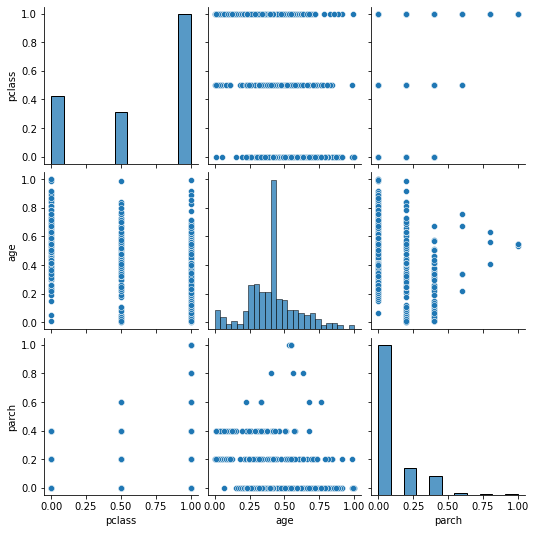

In [60]:
sns.pairplot(x_train_mmc)